<a href="https://colab.research.google.com/github/islam-rabiul/Machine-Learning-Projects/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics




Importing the Boston House Price Dataset

In [72]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [73]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [74]:
data.shape

(506, 14)

In [75]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [77]:
X = data.drop(['MEDV'], axis=1)
y = data['MEDV']

Splitting the data into Training data and Test data


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model on training dataset

In [79]:
model = XGBRegressor()

In [80]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction on training data

In [81]:
training_data_prediction = model.predict(X_train)

In [82]:
print(training_data_prediction)

[11.990929  19.915493  19.392988  13.408072  18.19098   24.603947
 21.08647   24.697266   8.70618   27.501347  20.708258  36.17404
 31.59529   11.69739   39.802494  13.893334  21.796898  23.695662
 17.590319  24.409176   8.799549  19.181791  25.278059  20.410582
 23.10783   37.90089   15.601625  45.400623  15.706774  22.599428
 14.514692  18.697655  17.797323  16.117708  20.609972  31.598558
 29.095152  15.600668  17.563873  22.51095   19.401443  19.287243
  8.4968405 20.607521  17.006351  17.093975  14.495169  49.98619
 14.284735  12.609954  28.688086  21.203852  19.306932  23.089056
 19.10372   25.004898  33.408142   4.992768  29.599434  18.685545
 21.707012  23.096918  22.802471  20.991085  48.796387  14.627051
 16.613852  27.075224  20.087227  19.794464  20.992268  41.290615
 23.175125  20.378569  18.558722  29.399414  36.40198   24.388987
 11.816533  13.792832  12.272116  17.794773  33.087368  26.73878
 13.393904  14.386449  50.004574  21.98985   19.906004  23.784376
 17.516703  1

In [83]:
score_1 = metrics.r2_score(y_train, training_data_prediction)



print("R squared error : ", score_1)

R squared error :  0.9999969829984965


Visualizing the actual Prices and predicted prices

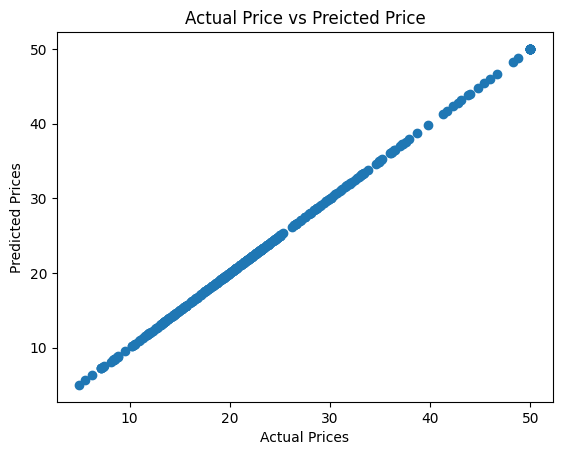

In [84]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on test data

In [85]:
test_data_prediction = model.predict(X_test)

In [86]:
score_1 = metrics.r2_score(y_test, test_data_prediction)



print("R squared error : ", score_1)

R squared error :  0.9057837838492537
